In [1]:
#starting with the importinf libraries 
import torch;
import torch.nn as nn

In [2]:
# Create a sample small data 
x = torch.arange(0,1,0.1).unsqueeze(1)
y = x*2 + 1

In [3]:
x_test = torch.tensor([[0.15],[0.55],[0.85]])
y_test = x_test * 2 + 1

In [4]:
# Creating a model
model = nn.Sequential(
    nn.Linear(1,1,)
)

In [5]:
# calculating the loss
loss_Fn = nn.L1Loss()
# help to learn the model effectively
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [6]:
epchoes = 200

#Training loop 
for epoch in range(epchoes):
    model.train()
    y_pred = model(x)
    loss = loss_Fn(y_pred,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 ==0:
        print(epoch , loss.item())

0 2.4122116565704346
10 2.291961431503296
20 2.1717116832733154
30 2.051461935043335
40 1.931212067604065
50 1.8109623193740845
60 1.690712332725525
70 1.5704625844955444
80 1.4502127170562744
90 1.3299628496170044
100 1.2097129821777344
110 1.0894629955291748
120 0.985334575176239
130 0.9010844230651855
140 0.8168343305587769
150 0.7564572095870972
160 0.7019669413566589
170 0.6474767923355103
180 0.6076677441596985
190 0.5764579176902771


In [7]:
model.eval()
test_loss = 0
with torch.inference_mode():
    y_test_pred = model(x_test)
    testLoss = loss_Fn(y_test_pred,y_test)

In [8]:
for name , params in model.named_parameters():
    print(name,params.data)

0.weight tensor([[0.0762]])
0.bias tensor([1.5126])


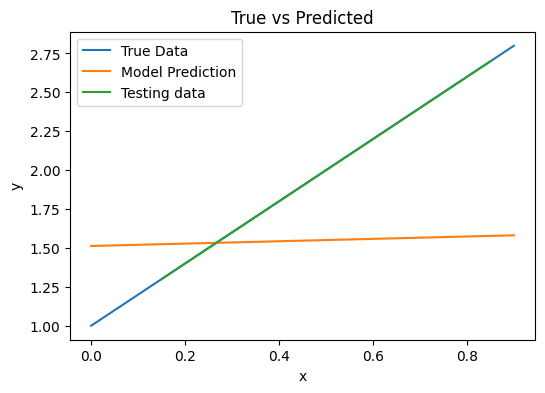

In [9]:
import matplotlib.pyplot as plt

with torch.inference_mode():
    y_pred = model(x)
    
plt.figure(figsize=(6,4))
plt.plot(x, y, label="True Data")           # original line (y = 2x + 1)
plt.plot(x, y_pred, label="Model Prediction")
plt.plot(x_test,y_test ,label="Testing data")
plt.legend()
plt.title("True vs Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [10]:
model.state_dict()

OrderedDict([('0.weight', tensor([[0.0762]])), ('0.bias', tensor([1.5126]))])

### Saving a model in pytorch
There are three main types of methods that are used for saving and loading model in pytorch

1. **torch.save()** - allows you to savve a pytorch object in pickle format
2. **torch.load()** - allow you to load a saved Pytorch object
3. **torch.nn.Module.load_state_dict()** - this allows to load a model's saved state dictionary

In [11]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_).pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

In [12]:
ls -l models


 Volume in drive C is OS
 Volume Serial Number is FCEF-C115

 Directory of c:\Users\anant\OneDrive\Desktop\AI\Deep learning\workflow


 Directory of c:\Users\anant\OneDrive\Desktop\AI\Deep learning\workflow\models

11/23/2025  10:42 AM    <DIR>          .
11/23/2025  10:51 AM    <DIR>          ..
11/25/2025  10:53 AM             2,181 01_pytorch_workflow_model_).pth
               1 File(s)          2,181 bytes
               2 Dir(s)  314,980,708,352 bytes free


File Not Found


### Loading a pytorch model

Since we saved our model's state dict() rather than entire model we'll create a new instance of our model class and **state_dict()** into that

In [15]:
import torch

# To load in a saved state_dict we have to instatiate a new instance of our model class
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

RuntimeError: Error(s) in loading state_dict for LinearRegressionModel:
	Missing key(s) in state_dict: "linear_layer.weight", "linear_layer.bias". 
	Unexpected key(s) in state_dict: "0.weight", "0.bias". 

### Linearc regression model class

In [ ]:
from torch import nn

# creating model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
        def forward(self, x) -> torch.Tensor:
            return self.linear_layer(x)
        
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1 = model_1.state_dict()